In [1]:
import os
import cv2
import matplotlib.pyplot as plt

### Kitti to yolo로 변환된 bounding box 검토

In [20]:
img_path = '/ultralytics/examples/Work_dir/kitti_dataset/train/images/000422_nbab5xd1rv.jpg'
lab_path = '/ultralytics/examples/Work_dir/kitti_dataset/train/labels/000422_nbab5xd1rv.txt'

In [21]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [22]:
img_height, img_width, _ = image.shape

In [23]:
with open(lab_path, 'r') as f:
    labels = f.readlines()

In [24]:
for label in labels:
    parts = label.strip().split()
    class_id = int(parts[0])  # 클래스 ID
    x_center_norm, y_center_norm, width_norm, height_norm = map(float, parts[1:])

    x_center = x_center_norm * img_width
    y_center = y_center_norm * img_height
    box_width = width_norm * img_width
    box_height = height_norm * img_height
    
    x_min = int(x_center - (box_width/2))
    y_min = int(y_center - (box_height/2))
    x_max = int(x_center + (box_width/2))
    y_max = int(y_center + (box_height/2))
    
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

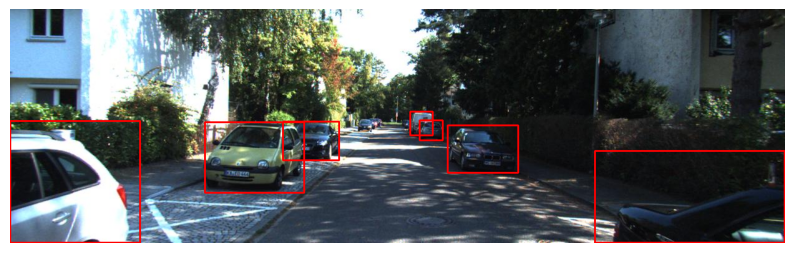

In [25]:
# 결과 출력
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

### SAM2 모델을 이용하기 위해 box 확인

In [47]:
i_path = '/ultralytics/examples/Work_dir/seg_test2.jpg'

In [68]:
img = cv2.imread(i_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [69]:
cv2.rectangle(img, (280, 290), (340, 450), (255, 0, 0), 2)

array([[[167, 190, 222],
        [167, 190, 222],
        [172, 191, 224],
        ...,
        [209, 224, 243],
        [209, 224, 243],
        [207, 222, 241]],

       [[168, 191, 223],
        [170, 190, 223],
        [171, 191, 224],
        ...,
        [209, 224, 243],
        [208, 223, 242],
        [208, 223, 242]],

       [[171, 191, 224],
        [172, 192, 225],
        [171, 191, 224],
        ...,
        [209, 224, 243],
        [209, 224, 243],
        [208, 223, 242]],

       ...,

       [[114, 104,  94],
        [116, 106,  96],
        [114, 101,  92],
        ...,
        [ 49,  46,  37],
        [ 48,  45,  36],
        [ 44,  44,  34]],

       [[107,  98,  89],
        [107,  97,  88],
        [109,  99,  90],
        ...,
        [ 46,  43,  34],
        [ 48,  45,  36],
        [ 47,  44,  35]],

       [[ 98,  89,  80],
        [110, 101,  92],
        [108,  98,  89],
        ...,
        [ 50,  47,  38],
        [ 50,  46,  37],
        [ 50,  46,  37]]

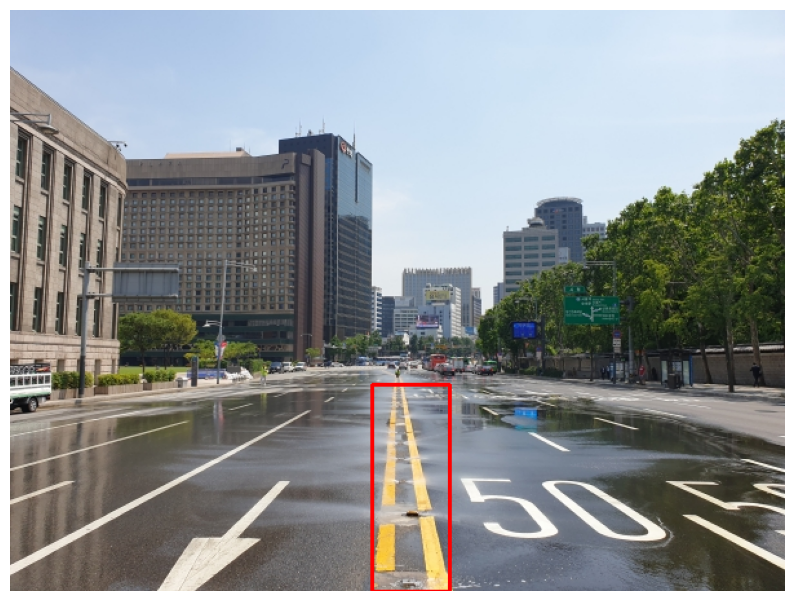

In [70]:
# 결과 출력
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()